In [2]:
pip install names

     |████████████████████████████████| 789 kB 2.1 MB/s eta 0:00:01
  Created wheel for names: filename=names-0.3.0-py3-none-any.whl size=803698 sha256=170f59633e2464103bc7b7832efb973045f2e95677602e437a0fb29413611e95
  Stored in directory: /Users/gavin/Library/Caches/pip/wheels/f1/bc/04/55ab9499ea02359ece8b02b4169ebb30aa52d82b84c13fc506
Successfully built names
Note: you may need to restart the kernel to use updated packages.


In [3]:
import names
firstNameList=[]
lastNameList=[]
for i in range(0,20000):
  firstNameList.append(names.get_first_name())
  lastNameList.append(names.get_last_name())

In [4]:
import numpy as np
firstNameList=np.array(firstNameList)
lastNameList=np.array(lastNameList)

In [ ]:
print(len(firstNameList))
print(len(lastNameList))

20000
20000


In [75]:
print(firstNameList)

['Maria' 'Nancy' 'Anthony' ... 'Gerald' 'David' 'Robert']


In [76]:
print(lastNameList)

['Watson' 'Monnier' 'Searles' ... 'Marks' 'Ledezma' 'Spencer']


In [5]:
import pandas as pd
fN=pd.DataFrame(firstNameList, columns=['Name']) 
lN=pd.DataFrame(lastNameList,columns=['Name'])

In [8]:
#0 means First Name 1 Means Last Name
fN['label']=0
lN['label']=1

In [9]:
finalDf = pd.concat([fN, lN], axis =0 )
finalDf =finalDf.sample(frac = 1)
finalDf.reset_index(inplace = True)
finalDf.drop(["index"], axis = 1, inplace = True)

In [10]:
print(finalDf.head(10))

        Name  label
0     Juarez      1
1     Harvey      1
2    Kathryn      0
3  Geraldine      0
4     Elkins      1
5    Sanchez      1
6     Philip      0
7      Susan      0
8       Hoke      1
9      Allen      1


In [11]:
def features(name):
    name = name.lower()
    return {
        'first-letter': name[0],
        'first2-letters': name[0:2],
        'first3-letters': name[0:3],
        'last-letter': name[-1],
        'last2-letters': name[-2:],
        'last3-letters': name[-3:],
    }

In [12]:
df_X=finalDf.apply(lambda row : features(row['Name']), axis = 1)
df_y=finalDf.label

In [13]:
from sklearn.model_selection import train_test_split
dfX_train, dfX_test, dfy_train, dfy_test = train_test_split(df_X, df_y, test_size=0.33, random_state=42)

In [14]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer()
dv.fit_transform(dfX_train)

<26800x4010 sparse matrix of type '<class 'numpy.float64'>'
	with 160800 stored elements in Compressed Sparse Row format>

In [19]:
dfypred=dclf.predict(dv.transform(dfX_test))

In [20]:
from sklearn.tree import DecisionTreeClassifier
 
dclf = DecisionTreeClassifier()
my_xfeatures =dv.transform(dfX_train)
dclf.fit(my_xfeatures, dfy_train)

DecisionTreeClassifier()

In [16]:
print(dclf.score(dv.transform(dfX_train), dfy_train)) 

0.9651119402985074


Training Accuracy


In [ ]:
print(dclf.score(dv.transform(dfX_train), dfy_train)) 

0.966679104477612


Testing Accuracy


In [17]:
print(dclf.score(dv.transform(dfX_test), dfy_test))

0.9282575757575757


Confusion Matrix


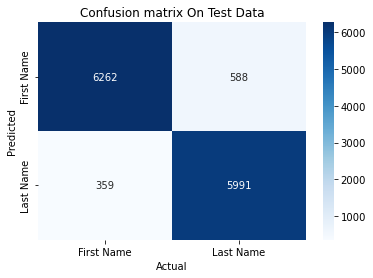

In [72]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
lr_fig=plt.figure()
cm_lr = confusion_matrix(dfypred, dfy_test)
new_cm_lr = pd.DataFrame(cm_lr , index = ['First Name','Last Name'] , columns = ['First Name','Last Name'])
sns.heatmap(new_cm_lr,cmap= 'Blues', annot = True, fmt='',xticklabels = ['First Name','Last Name'], yticklabels = ['First Name','Last Name'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

Manual Testing

In [22]:
def Namepredictor(a):
    test_name1 = a
    transform_dv =dv.transform(features(test_name1))
    vector = transform_dv.toarray()
    if dclf.predict(vector) == 0:
        print("First Name")
    else:
        print("Last Name")

In [23]:
random_name_list = ["Alex","Alice","Chioma","Vitalic","Clairese","Chan"]
for n in random_name_list:
    Namepredictor(n)

First Name
First Name
First Name
Last Name
Last Name
Last Name


In [24]:
def Namepredictor1(position,name):
    test_name1 = name
    transform_dv =dv.transform(features(test_name1))
    vector = transform_dv.toarray()
    if dclf.predict(vector) == position:
        return True
    else:
        return False

In [25]:
def detectAMistake(name):
  namesList=name.split()
  fake=0
  for i,n in enumerate(namesList):
    if not Namepredictor1(i,n):
      return 'Incorrect Name'
      fake=1
      break;
  if fake==0:
    return 'Correct Name'

In [74]:
name =input("Please Enter the Name: ")
print(detectAMistake(name))

Please Enter the Name: Bagchadani Nisha
Incorrect Name


Saving the Model

In [40]:
import pickle
dctreeModel = open("/Users/gavin/Downloads/namesdetectormodel.pkl","wb")
pickle.dump(dclf,dctreeModel)
dctreeModel.close()

Loading

In [44]:
loaded_model = pickle.load(open('/Users/gavin/Downloads/namesdetectormodel.pkl', 'rb'))
result = loaded_model.score(dv.transform(dfX_test), dfy_test)
print(result)

0.9278030303030304


Testing on File

In [46]:
import names
fList_test=[]
lList_test=[]
for i in range(0,200):
  fList_test.append(names.get_first_name())
  lList_test.append(names.get_last_name())
for i in range(0,200):
  fList_test.append(names.get_last_name())
  lList_test.append(names.get_first_name())

In [47]:
import numpy as np
fList_test=np.array(fList_test)
lList_test=np.array(lList_test)

In [48]:
import pandas as pd
fNtest=pd.DataFrame(fList_test, columns=['First Name']) 
lNtest=pd.DataFrame(lList_test,columns=['Last Name'])

In [49]:
fDf = pd.concat([fNtest, lNtest], axis =1 )
fDf =fDf.sample(frac = 1)
fDf.reset_index(inplace = True)
fDf.drop(["index"], axis = 1, inplace = True)

In [50]:
fDf

First Name Last Name
0     Erickson    Ronald
1         John     Perez
2         Lori     Perna
3        Roger    Webber
4      Luciano   Richard
..         ...       ...
395    Yolanda    Zamora
396     Briggs       Roy
397     Daniel     Beach
398     Daniel   Farrell
399       Anne    Turner

[400 rows x 2 columns]

In [51]:
fDf['Full Name'] = fDf.apply(lambda row : row['First Name']+' '+row['Last Name'],axis = 1)

In [52]:
fDf['label'] = fDf.apply(lambda row : detectAMistake(row['Full Name']),axis = 1)

In [53]:
fDf

First Name Last Name        Full Name           label
0     Erickson    Ronald  Erickson Ronald  Incorrect Name
1         John     Perez       John Perez    Correct Name
2         Lori     Perna       Lori Perna    Correct Name
3        Roger    Webber     Roger Webber    Correct Name
4      Luciano   Richard  Luciano Richard  Incorrect Name
..         ...       ...              ...             ...
395    Yolanda    Zamora   Yolanda Zamora    Correct Name
396     Briggs       Roy       Briggs Roy  Incorrect Name
397     Daniel     Beach     Daniel Beach    Correct Name
398     Daniel   Farrell   Daniel Farrell    Correct Name
399       Anne    Turner      Anne Turner    Correct Name

[400 rows x 4 columns]

In [54]:
fDf.to_csv('OutPut.csv')

Testing on File


In [60]:
idf=pd.read_csv('/Users/gavin/Downloads/names csv (3).csv')

In [61]:
idf.head(20)

Mr. John Smith
0       Mike Godwin
1      Smith, Aaron
2  Toby Luke Harris
3   John Fitzgerald
4   Maguire, Thomas
5    Maguire Thomas

In [62]:
import re
def processString(txt):
  txt = re.sub(',', '', txt)
  txt = re.sub('Mr. ', '', txt)
  txt = re.sub('Mrs. ', '', txt)
  txt = re.sub('Ms. ', '', txt)
  txt = re.sub('Dr. ', '', txt)
  return txt

In [63]:
idf['Processed Names']=idf['Names'].apply(lambda txt:processString(txt))

KeyError: 'Names'

In [64]:
idf[['First Name', 'Middle Name']] = idf['Processed Names'].str.split(' ', 1, expand=True)

KeyError: 'Processed Names'

In [ ]:
idf[['Last Name','Middle Name']] = idf['Middle Name'].str.split(' ', 1, expand=True)

In [ ]:
idf['label'] = idf.apply(lambda row : detectAMistake(row['First Name']+' '+ row['Last Name']),axis = 1)

In [ ]:
idf.to_csv('names_labeled.csv')

import names
firstNameList=[]
lastNameList=[]
for i in range(0,20000):
  firstNameList.append(names.get_first_name())
  lastNameList.append(names.get_last_name())

import numpy as np
firstNameList=np.array(firstNameList)
lastNameList=np.array(lastNameList)